<a href="https://colab.research.google.com/github/InduwaraGayashan001/OpenCV/blob/main/Image_Manipulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/rys6f1vprily2bg/opencv_bootcamp_assets_NB2.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB2.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

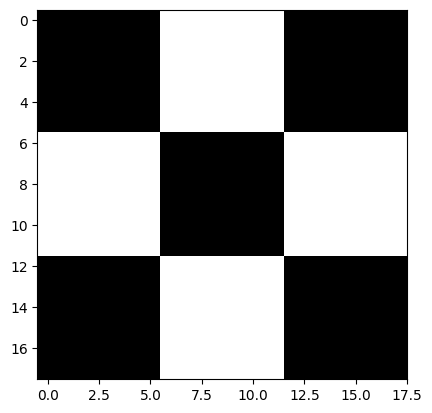

In [4]:
# Read image as gray scale.
cb_img = cv2.imread("checkerboard_18x18.png", 0)

# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap="gray")
print(cb_img)

# Accssing Individual Pixels

In [6]:
# print the first pixel of the first black box
print(cb_img[0, 0])
# print the first white pixel to the right of the first black box
print(cb_img[0, 6])

0
255


# Modifying Image Pixels

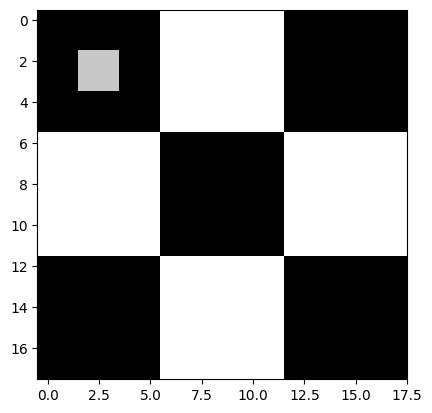

In [7]:
cb_img_copy = cb_img.copy()
cb_img_copy[2:4, 2:4] = 200
plt.imshow(cb_img_copy, cmap="gray")

# Cropping Images

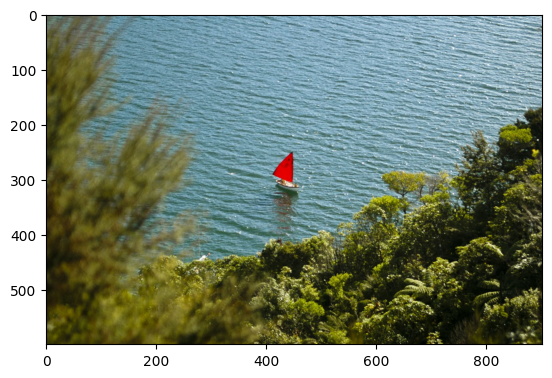

In [8]:
img_NZ_bgr = cv2.imread("New_Zealand_Boat.jpg")
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_NZ_rgb)

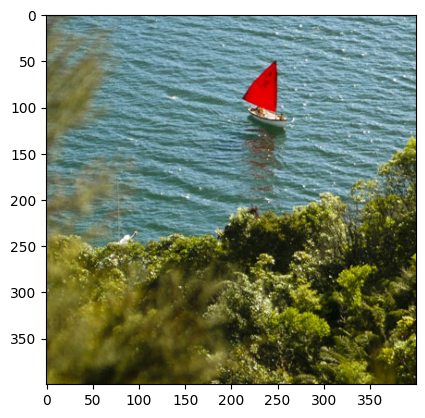

In [11]:
cropped_region = img_NZ_rgb[200:600, 200:600]
plt.imshow(cropped_region)

# Resizing

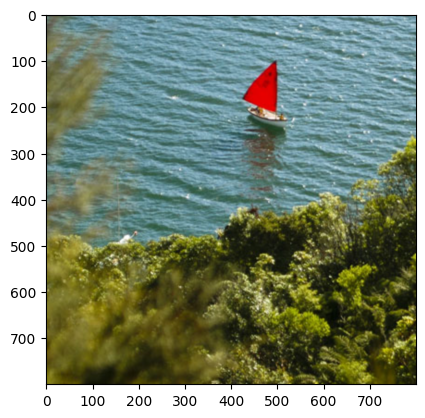

In [16]:
resized_img_x2 = cv2.resize(cropped_region, None, fx=2, fy=2) # default interpolation --> Linear
plt.imshow(resized_img_x2)

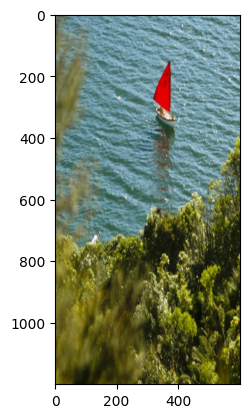

In [20]:
desired_width = 600
desired_height = 1200

dim = (desired_width, desired_height)
resized_img = cv2.resize(cropped_region, dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_img)


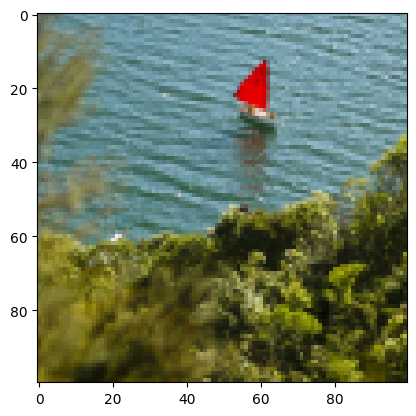

In [14]:
desired_width = 100
aspect_ratio = desired_width / cropped_region.shape[1]
desired_height = int(cropped_region.shape[0] * aspect_ratio)

dim = (desired_width, desired_height)

resized_img = cv2.resize(cropped_region, dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_img)

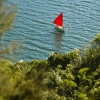

In [17]:
cv2.imwrite("resized_img.jpg", resized_img[:,:,::-1])
Image("resized_img.jpg")

# Flipping

Text(0.5, 1.0, 'Both Flip')

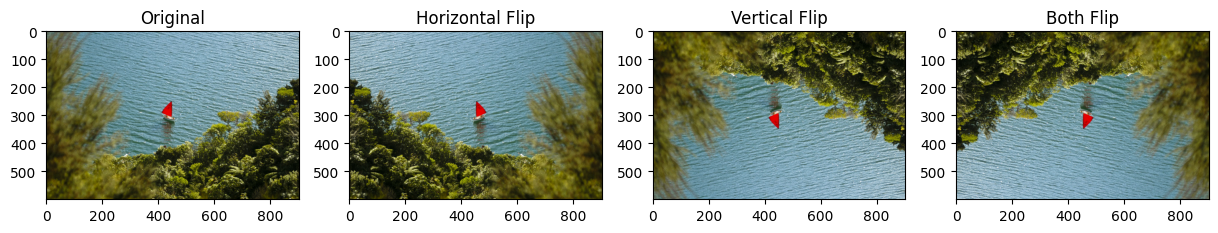

In [19]:
img_NZ_rgb_flip_horizontal = cv2.flip(img_NZ_rgb, 1)
img_NZ_rgb_flip_vertical = cv2.flip(img_NZ_rgb, 0)
img_NZ_rgb_flip_both = cv2.flip(img_NZ_rgb, -1)

plt.figure(figsize=(15, 15))
plt.subplot(1, 4, 1)
plt.imshow(img_NZ_rgb)
plt.title("Original")

plt.subplot(1, 4, 2)
plt.imshow(img_NZ_rgb_flip_horizontal)
plt.title("Horizontal Flip")

plt.subplot(1, 4, 3)
plt.imshow(img_NZ_rgb_flip_vertical)
plt.title("Vertical Flip")

plt.subplot(1, 4, 4)
plt.imshow(img_NZ_rgb_flip_both)
plt.title("Both Flip")
